In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Clean the data of the premiums for all plans  sold on the Medicare Advantage market in 2018 in 25 states

In [2]:
premium = pd.read_csv('landscape_2018_AlabamatoMontana.csv',skiprows=3)
premium.head()

C:\Users\wynbu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,State,County,Organization Name,Plan Name,Contract ID,Plan ID,Segment ID,Organization Type,Plan Type,Special Needs Plan,...,Part D Total Premium5,Part D Premium Obligation with Full Premium Assistance6,Part D Premium Obligation with 75% Premium Assistance,Part D Premium Obligation with 50% Premium Assistance,Part D Premium Obligation with 25% Premium Assistance,Part D Drug Deductible,Tiers Not Subject to Deductible7,Increased Initial Coverage Limit8,Extra Coverage in Gap,Unnamed: 26
0,Alabama,(All Counties),UnitedHealthcare,Symphonix Value Rx (PDP),S0522,16.0,0.0,PDP,Medicare Prescription Drug Plan,No,...,$25.80,$0.00,$6.40,$12.90,$19.30,$405.00,NaN,NaN,NaN,NaN
1,Alabama,(All Counties),BlueRx (PDP),BlueRx Option II (PDP),S1030,1.0,0.0,PDP,Medicare Prescription Drug Plan,No,...,$124.70,$94.10,$101.70,$109.40,$117.00,$0.00,NaN,NaN,NaN,NaN
2,Alabama,(All Counties),BlueRx (PDP),BlueRx Option I (PDP),S1030,6.0,0.0,PDP,Medicare Prescription Drug Plan,No,...,$73.70,$43.10,$50.70,$58.40,$66.00,$405.00,NaN,NaN,NaN,NaN
3,Alabama,(All Counties),Farm Bureau Health Plans,Farm Bureau Essential Rx (PDP),S2668,5.0,0.0,PDP,Medicare Prescription Drug Plan,No,...,$46.60,$16.00,$23.60,$31.30,$38.90,$405.00,NaN,NaN,NaN,NaN
4,Alabama,(All Counties),Farm Bureau Health Plans,Farm Bureau Select Rx (PDP),S2668,6.0,0.0,PDP,Medicare Prescription Drug Plan,No,...,$74.40,$43.80,$51.40,$59.10,$66.70,$0.00,NaN,NaN,NaN,NaN


## 1. Dataset Overview
### number of rows with data

In [3]:
rows_with_data = premium.count(axis = 'rows')
rows_with_data

State                                                      19371
County                                                     19371
Organization Name                                          19371
Plan Name                                                  19371
Contract ID                                                19371
Plan ID                                                    19371
Segment ID                                                 19371
Organization Type                                          19371
Plan Type                                                  19371
Special Needs Plan                                         19371
Special Needs Plan Type                                     4833
Benefit Type                                               19025
Part D Basic Premium Below Regional Benchmark?              4751
National PDP                                                 521
Part C Premium2                                            16935
Part D Basic Premium3    

### number of variables with data

In [4]:
variables_with_data = premium.count(axis = 'columns')
variables_with_data

0        21
1        19
2        19
3        19
4        19
         ..
37803     0
37804     0
37805     0
37806     0
37807     0
Length: 37808, dtype: int64

### How many products are there in the data? 

In [5]:
# Check if all the ID data are the same type
print(premium['Plan ID'].dtypes)
premium.dropna(subset = ['Plan ID','Segment ID','Contract ID'], inplace = True)
premium['Plan ID'] = premium['Plan ID'].astype(int)
print(premium['Segment ID'].dtypes)
premium['Segment ID'] = premium['Segment ID'].astype(int)

float64
float64


In [6]:
# number of products
premium[['Contract ID', 'Plan ID', 'Segment ID']].drop_duplicates().count().iloc[0]

2149

### How many organizations sell products in the data? 

In [7]:
# number of organizations
premium['Organization Name'].nunique()

229

### which organization sell the most products

In [8]:
premium.drop_duplicates(subset = ['Contract ID', 'Plan ID', 'Segment ID'])['Organization Name'].value_counts()

UnitedHealthcare                  313
Humana Insurance Company          157
Aetna Medicare                    102
WellCare                           91
Humana Medical Plan, Inc.          64
                                 ... 
L.A. Care Cal MediConnect Plan      1
Essential Advantage                 1
Molina Healthcare of Illinois       1
Passport Advantage                  1
CLOVER HEALTH                       1
Name: Organization Name, Length: 229, dtype: int64

## Data Cleaning

### Drop Duplicates

In [9]:
# count duplicates
premium[['Contract ID', 'Plan ID', 'Segment ID','County','State']].count().iloc[0] - premium[['Contract ID', 'Plan ID', 'Segment ID','County','State']].drop_duplicates().count().iloc[0]

74

In [10]:
# drop duplicates
premium = premium.drop_duplicates()
premium.count(axis = 'rows')

State                                                      19297
County                                                     19297
Organization Name                                          19297
Plan Name                                                  19297
Contract ID                                                19297
Plan ID                                                    19297
Segment ID                                                 19297
Organization Type                                          19297
Plan Type                                                  19297
Special Needs Plan                                         19297
Special Needs Plan Type                                     4802
Benefit Type                                               18953
Part D Basic Premium Below Regional Benchmark?              4739
National PDP                                                 521
Part C Premium2                                            16870
Part D Basic Premium3    

### Remove unwanted plan types

In [11]:
premium1 = premium[premium['Plan Type'] != 'Medicare Prescription Drug Plan']
premium['Plan Type'].count() - premium1['Plan Type'].count()

594

In [12]:
premium2 = premium1[premium1['Special Needs Plan'] != 'Yes']
premium['Plan Type'].count() - premium2['Plan Type'].count()

5396

In [13]:
# convert price to numbers
premium2[['Part C Premium2','Part D Basic Premium3','Part D Supplemental Premium4','Part D Total Premium5',
          'Part D Premium Obligation with Full Premium Assistance6','Part D Premium Obligation with 75% Premium Assistance',
          'Part D Premium Obligation with 50% Premium Assistance','Part D Premium Obligation with 25% Premium Assistance',
          'Part D Drug Deductible']] = premium2[['Part C Premium2','Part D Basic Premium3','Part D Supplemental Premium4','Part D Total Premium5',
          'Part D Premium Obligation with Full Premium Assistance6','Part D Premium Obligation with 75% Premium Assistance',
          'Part D Premium Obligation with 50% Premium Assistance','Part D Premium Obligation with 25% Premium Assistance',
          'Part D Drug Deductible']].replace('[\$,]', '', regex=True).astype(float)
premium2.head()

C:\Users\wynbu\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,State,County,Organization Name,Plan Name,Contract ID,Plan ID,Segment ID,Organization Type,Plan Type,Special Needs Plan,...,Part D Total Premium5,Part D Premium Obligation with Full Premium Assistance6,Part D Premium Obligation with 75% Premium Assistance,Part D Premium Obligation with 50% Premium Assistance,Part D Premium Obligation with 25% Premium Assistance,Part D Drug Deductible,Tiers Not Subject to Deductible7,Increased Initial Coverage Limit8,Extra Coverage in Gap,Unnamed: 26
25,Alabama,Autauga,Blue Advantage (PPO),Blue Advantage Complete (PPO),H0104,12,0,Local CCP,Local PPO,No,...,33.2,2.6,10.2,17.9,25.5,150.0,1.0,NaN,NaN,NaN
26,Alabama,Autauga,Blue Advantage (PPO),Blue Advantage Premier (PPO),H0104,15,0,Local CCP,Local PPO,No,...,61.0,30.4,38.0,45.7,53.3,0.0,NaN,NaN,NaN,NaN
28,Alabama,Autauga,Cigna-HealthSpring,Cigna-HealthSpring Preferred (HMO),H0150,24,1,Local CCP,HMO,No,...,0.0,0.0,0.0,0.0,0.0,200.0,1.0,NaN,Y,NaN
29,Alabama,Autauga,VIVA Medicare,VIVA Medicare Premier (HMO),H0154,11,0,Local CCP,HMO,No,...,70.5,39.9,47.5,55.2,62.8,0.0,NaN,NaN,Y,NaN
31,Alabama,Autauga,VIVA Medicare,VIVA Medicare Plus (HMO),H0154,15,1,Local CCP,HMO,No,...,0.0,0.0,0.0,0.0,0.0,200.0,1.0,NaN,NaN,NaN


In [14]:
#create total premium column
premium2 = premium2.drop(columns = ['Part D Basic Premium3','Part D Supplemental Premium4',
          'Part D Premium Obligation with Full Premium Assistance6','Part D Premium Obligation with 75% Premium Assistance',
          'Part D Premium Obligation with 50% Premium Assistance','Part D Premium Obligation with 25% Premium Assistance',
          'Part D Drug Deductible'])

premium2['Total Premium'] = premium2['Part C Premium2'] + premium2['Part D Total Premium5']
premium2.dropna(subset = ['Total Premium'], inplace = True)
premium2

,State,County,Organization Name,Plan Name,Contract ID,Plan ID,Segment ID,Organization Type,Plan Type,Special Needs Plan,...,Benefit Type,Part D Basic Premium Below Regional Benchmark?,National PDP,Part C Premium2,Part D Total Premium5,Tiers Not Subject to Deductible7,Increased Initial Coverage Limit8,Extra Coverage in Gap,Unnamed: 26,Total Premium
25,Alabama,Autauga,Blue Advantage (PPO),Blue Advantage Complete (PPO),H0104,12,0,Local CCP,Local PPO,No,...,Enhanced Alternative,NaN,NaN,15.8,33.2,1.0,NaN,NaN,NaN,49.0
26,Alabama,Autauga,Blue Advantage (PPO),Blue Advantage Premier (PPO),H0104,15,0,Local CCP,Local PPO,No,...,Enhanced Alternative,NaN,NaN,98.0,61.0,NaN,NaN,NaN,NaN,159.0
28,Alabama,Autauga,Cigna-HealthSpring,Cigna-HealthSpring Preferred (HMO),H0150,24,1,Local CCP,HMO,No,...,Enhanced Alternative,NaN,NaN,0.0,0.0,1.0,NaN,Y,NaN,0.0
29,Alabama,Autauga,VIVA Medicare,VIVA Medicare Premier (HMO),H0154,11,0,Local CCP,HMO,No,...,Enhanced Alternative,NaN,NaN,38.5,70.5,NaN,NaN,Y,NaN,109.0
31,Alabama,Autauga,VIVA Medicare,VIVA Medicare Plus (HMO),H0154,15,1,Local CCP,HMO,No,...,Enhanced Alternative,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19365,Montana,Yellowstone,Blue Cross and Blue Shield of Montana,Blue Cross Medicare Advantage Classic (PPO),H0107,3,0,Local CCP,Local PPO,No,...,Enhanced Alternative,NaN,NaN,28.3,32.7,1.0,NaN,Y,NaN,61.0
19366,Montana,Yellowstone,Blue Cross and Blue Shield of Montana,Blue Cross Medicare Advantage Optimum (PPO),H0107,4,0,Local CCP,Local PPO,No,...,Enhanced Alternative,NaN,NaN,50.0,52.0,1.0,NaN,Y,NaN,102.0
19367,Montana,Yellowstone,PacificSource Medicare,PacificSource Medicare MyCare Rx 29 (HMO),H3864,29,0,Local CCP,HMO,No,...,Enhanced Alternative,NaN,NaN,0.5,42.5,1.0,NaN,NaN,NaN,43.0
19368,Montana,Yellowstone,Humana Insurance Company,HumanaChoice H5216-089 (PPO),H5216,89,0,Local CCP,Local PPO,No,...,Enhanced Alternative,NaN,NaN,49.1,23.9,1.0,NaN,NaN,NaN,73.0


## Describe the cleaned premiums data

### By state description

In [15]:
form1 = premium2.groupby('State')['Total Premium'].agg(['min', 'mean', 'median', 'max'])
form1.to_csv('form1.csv')
form1

,min,mean,median,max
State,,,,
Alabama,0.0,63.093126,49.0,159.0
Arizona,0.0,65.807595,47.0,190.0
Arkansas,0.0,48.160926,39.0,132.0
California,0.0,32.194318,25.0,247.0
Colorado,0.0,49.516592,46.0,196.0
Connecticut,0.0,63.483459,40.0,236.0
Delaware,0.0,46.857143,32.0,119.0
Florida,0.0,20.299002,0.0,147.8
Georgia,0.0,37.719858,39.0,93.0


### The fraction of plans that offer 0 premiums

In [16]:
premium2['temp'] = premium2['Total Premium'] == 0
form2 = premium2.groupby('State')['temp'].mean()
form2.to_csv('form2.csv')
form2

State
Alabama          0.230599
Arizona          0.354430
Arkansas         0.127352
California       0.383523
Colorado         0.322870
Connecticut      0.338346
Delaware         0.285714
Florida          0.748337
Georgia          0.273936
Hawaii           0.280000
Idaho            0.039548
Illinois         0.152457
Indiana          0.210829
Iowa             0.620626
Kansas           0.141509
Kentucky         0.196622
Louisiana        0.362369
Maine            0.210526
Maryland         0.010526
Massachusetts    0.177686
Michigan         0.152748
Minnesota        0.000000
Mississippi      0.188011
Missouri         0.217082
Montana          0.000000
Name: temp, dtype: float64

### Plan prices description

In [74]:
premium2.groupby('Plan Type')['Total Premium'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
Plan Type,,,,
HMO,0.0,29.365840,7.7,292.0
HMOPOS,0.0,76.567844,56.0,306.5
Local PPO,0.0,63.657946,50.6,312.5
PFFS,24.0,97.726293,95.0,190.0
Regional PPO,0.0,78.670330,73.0,184.0


In [18]:
premium2.groupby('Organization Name')['Total Premium'].agg(['min', 'mean', 'median', 'max'])

,min,mean,median,max
Organization Name,,,,
ARKANSAS BLUE CROSS AND BLUE SHIELD,42.5,48.346154,44.5,73.5
Aetna Medicare,0.0,27.691940,0.0,136.0
Alignment Health Plan,0.0,15.710526,12.0,35.5
Allwell,0.0,2.462366,0.0,59.0
Anthem Blue Cross,0.0,12.865854,0.0,54.0
...,...,...,...,...
Upper Peninsula Health Plan,0.0,56.500000,56.5,113.0
VIVA Medicare,0.0,52.316667,28.0,109.0
"Vantage Health Plan, Inc.",0.0,65.824797,49.0,245.0


## Cleaned Data Storage

In [19]:
premium2.to_csv('premium2.csv', index=False)

# Clean the Data of Enrollment by Contract-Plan in each county in the country in 2018

In [20]:
enroll = pd.read_csv('enrollment_2018.csv')
enroll.shape
enroll

,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County,Enrollment
0,E0654,801,55830,NaN,NaN,NaN,*
1,E0654,801,2198,NaN,NaN,NaN,*
2,E0654,801,2195,NaN,NaN,NaN,*
3,E0654,801,2275,NaN,NaN,NaN,*
4,E0654,801,1000,1001.0,AL,Autauga,*
...,...,...,...,...,...,...,...
2304212,S9701,804,53180,56037.0,WY,Sweetwater,*
2304213,S9701,804,53190,56039.0,WY,Teton,*
2304214,S9701,804,53200,56041.0,WY,Uinta,*
2304215,S9701,804,53210,56043.0,WY,Washakie,*


## 1. Dataset Overview

In [21]:
enroll.dropna(subset = ['State','State'], inplace = True)
enroll.shape

(2298189, 7)

In [22]:
enroll.replace({'*':0},inplace=True)
enroll

,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County,Enrollment
4,E0654,801,1000,1001.0,AL,Autauga,0
5,E0654,801,1010,1003.0,AL,Baldwin,15
6,E0654,801,1020,1005.0,AL,Barbour,0
7,E0654,801,1030,1007.0,AL,Bibb,0
8,E0654,801,1040,1009.0,AL,Blount,0
...,...,...,...,...,...,...,...
2304212,S9701,804,53180,56037.0,WY,Sweetwater,0
2304213,S9701,804,53190,56039.0,WY,Teton,0
2304214,S9701,804,53200,56041.0,WY,Uinta,0
2304215,S9701,804,53210,56043.0,WY,Washakie,0


In [23]:
enroll['Enrollment'] = enroll['Enrollment'].astype(int)

In [24]:
enroll['Enrollment'].sum()

46300084

In [25]:
enroll.groupby('State')['Enrollment'].max().idxmax()

'CA'

## Data Cleaning

In [26]:
print(enroll['Plan ID'].dtypes)
enroll.dropna(subset = ['Plan ID','Contract Number'], inplace = True)
# count duplicates
enroll[enroll.duplicated(subset = ['Contract Number', 'Plan ID','State','County'])]

int64


,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County,Enrollment
207,E0654,801,5210,6037.0,CA,Los Angeles,0
3452,E3014,801,5200,6037.0,CA,Los Angeles,23
6695,E4744,801,5210,6037.0,CA,Los Angeles,0
10471,H0104,801,5210,6037.0,CA,Los Angeles,0
13612,H0104,802,5200,6037.0,CA,Los Angeles,0
...,...,...,...,...,...,...,...
2288643,S9579,804,5210,6037.0,CA,Los Angeles,0
2291802,S9701,801,5210,6037.0,CA,Los Angeles,0
2294961,S9701,802,5200,6037.0,CA,Los Angeles,0
2298118,S9701,803,5200,6037.0,CA,Los Angeles,0


In [27]:
# Aggregate dupplicates
enroll.groupby(['Contract Number', 'Plan ID','State','County'])['Enrollment'].sum().shape

(2297384,)

In [28]:
enroll.drop('Enrollment', axis = 1)

,Contract Number,Plan ID,SSA State County Code,FIPS State County Code,State,County
4,E0654,801,1000,1001.0,AL,Autauga
5,E0654,801,1010,1003.0,AL,Baldwin
6,E0654,801,1020,1005.0,AL,Barbour
7,E0654,801,1030,1007.0,AL,Bibb
8,E0654,801,1040,1009.0,AL,Blount
...,...,...,...,...,...,...
2304212,S9701,804,53180,56037.0,WY,Sweetwater
2304213,S9701,804,53190,56039.0,WY,Teton
2304214,S9701,804,53200,56041.0,WY,Uinta
2304215,S9701,804,53210,56043.0,WY,Washakie


In [29]:
temp = enroll.groupby(['Contract Number', 'Plan ID','State','County'])['Enrollment'].sum().reset_index()

In [30]:
temp

,Contract Number,Plan ID,State,County,Enrollment
0,E0654,801,AK,Aleutians East,0
1,E0654,801,AK,Aleutians West,0
2,E0654,801,AK,Anchorage,140
3,E0654,801,AK,Bethel,0
4,E0654,801,AK,Bristol Bay,0
...,...,...,...,...,...
2297379,S9701,804,WY,Sweetwater,0
2297380,S9701,804,WY,Teton,0
2297381,S9701,804,WY,Uinta,0
2297382,S9701,804,WY,Washakie,0


###  Find or create a conversion dictionary and replace the abbreviation codes with full state names

In [31]:
state_map = {"AL": "Alabama",
  "AK": "Alaska",
  "AZ": "Arizona",
  "AR": "Arkansas",
  "CA": "California",
  "CO": "Colorado",
  "CT": "Connecticut",
  "DE": "Delaware",
  "DC": "District of Columbia",
  "FL": "Florida",
  "GA": "Georgia",
  "HI": "Hawaii",
  "ID": "Idaho",
  "IL": "Illinois",
  "IN": "Indiana",
  "IA": "Iowa",
  "KS": "Kansas",
  "KY": "Kentucky",
  "LA": "Louisiana",
  "ME": "Maine",
  "MT": "Montana",
  "NE": "Nebraska",
  "NV": "Nevada",
  "NH": "New Hampshire",
  "NJ": "New Jersey",
  "NM": "New Mexico",
  "NY": "New York",
  "NC": "North Carolina",
  "ND": "North Dakota",
  "OH": "Ohio",
  "OK": "Oklahoma",
  "OR": "Oregon",
  "MD": "Maryland",
  "MA": "Massachusetts",
  "MI": "Michigan",
  "MN": "Minnesota",
  "MS": "Mississippi",
  "MO": "Missouri",
  "PA": "Pennsylvania",
  "RI": "Rhode Island",
  "SC": "South Carolina",
  "SD": "South Dakota",
  "TN": "Tennessee",
  "TX": "Texas",
  "UT": "Utah",
  "VT": "Vermont",
  "VA": "Virginia",
  "WA": "Washington",
  "WV": "West Virginia",
  "WI": "Wisconsin",
  "WY": "Wyoming"}

In [32]:
temp = temp[temp['State'].apply(lambda x: x not in ['PR','GU','AS','VI','MP'])]

In [33]:
temp['State'] = temp['State'].apply(lambda x: state_map[x])
temp

C:\Users\wynbu\AppData\Local\Temp/ipykernel_36108/2937389656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['State'] = temp['State'].apply(lambda x: state_map[x])


,Contract Number,Plan ID,State,County,Enrollment
0,E0654,801,Alaska,Aleutians East,0
1,E0654,801,Alaska,Aleutians West,0
2,E0654,801,Alaska,Anchorage,140
3,E0654,801,Alaska,Bethel,0
4,E0654,801,Alaska,Bristol Bay,0
...,...,...,...,...,...
2297379,S9701,804,Wyoming,Sweetwater,0
2297380,S9701,804,Wyoming,Teton,0
2297381,S9701,804,Wyoming,Uinta,0
2297382,S9701,804,Wyoming,Washakie,0


### 2.f.

In [34]:
temp.to_csv('enroll2.csv', index=False)

### 3.a.

In [35]:
premium2
premium2.columns

Index(['State', 'County', 'Organization Name', 'Plan Name', 'Contract ID',
       'Plan ID', 'Segment ID', 'Organization Type', 'Plan Type',
       'Special Needs Plan', 'Special Needs Plan Type', 'Benefit Type',
       'Part D Basic Premium Below Regional Benchmark?', 'National PDP',
       'Part C Premium2', 'Part D Total Premium5',
       'Tiers Not Subject to Deductible7', 'Increased Initial Coverage Limit8',
       'Extra Coverage in Gap', 'Unnamed: 26', 'Total Premium', 'temp'],
      dtype='object')

In [36]:
premium2_temp = premium2.groupby(['Contract ID', 'Plan ID','State','County'])['Total Premium'].mean().reset_index()
premium2_temp

,Contract ID,Plan ID,State,County,Total Premium
0,H0028,4,Hawaii,Honolulu,0.0
1,H0028,4,Hawaii,Kauai,0.0
2,H0028,4,Hawaii,Maui,0.0
3,H0028,8,Iowa,Benton,0.0
4,H0028,8,Iowa,Black Hawk,0.0
...,...,...,...,...,...
12091,R7444,8,Georgia,Whitfield,39.0
12092,R7444,8,Georgia,Wilcox,39.0
12093,R7444,8,Georgia,Wilkes,39.0
12094,R7444,8,Georgia,Wilkinson,39.0


In [37]:
premium_new = premium2.merge(premium2_temp, on = ['Contract ID', 'Plan ID','State','County','Total Premium'],
                       how = 'right').drop(columns = ['Plan Name','Segment ID',
                                                      'Organization Type','Special Needs Plan', 'Special Needs Plan Type', 'Benefit Type',
       'Part D Basic Premium Below Regional Benchmark?', 'National PDP',
       'Part C Premium2', 'Part D Total Premium5',
       'Tiers Not Subject to Deductible7', 'Increased Initial Coverage Limit8',
       'Extra Coverage in Gap', 'Unnamed: 26', 'temp'])
premium_new

,State,County,Organization Name,Contract ID,Plan ID,Plan Type,Total Premium
0,Hawaii,Honolulu,"CHA HMO, Inc.",H0028,4,HMO,0.0
1,Hawaii,Kauai,"CHA HMO, Inc.",H0028,4,HMO,0.0
2,Hawaii,Maui,"CHA HMO, Inc.",H0028,4,HMO,0.0
3,Iowa,Benton,"CHA HMO, Inc.",H0028,8,HMO,0.0
4,Iowa,Black Hawk,"CHA HMO, Inc.",H0028,8,HMO,0.0
...,...,...,...,...,...,...,...
12091,Georgia,Whitfield,UnitedHealthcare,R7444,8,Regional PPO,39.0
12092,Georgia,Wilcox,UnitedHealthcare,R7444,8,Regional PPO,39.0
12093,Georgia,Wilkes,UnitedHealthcare,R7444,8,Regional PPO,39.0
12094,Georgia,Wilkinson,UnitedHealthcare,R7444,8,Regional PPO,39.0


In [38]:
premium_new.shape[0]

12096

# Combine Two Datasets

In [39]:
temp.shape

(2265943, 5)

In [40]:
# get the list of states in the price df
unique_states = premium_new['State'].unique()
unique_states

array(['Hawaii', 'Iowa', 'Alabama', 'Montana', 'Georgia', 'Arizona',
       'California', 'Colorado', 'Connecticut', 'Minnesota', 'Florida',
       'Mississippi', 'Kentucky', 'Maryland', 'Idaho', 'Kansas',
       'Missouri', 'Maine', 'Illinois', 'Arkansas', 'Indiana',
       'Massachusetts', 'Louisiana', 'Delaware', 'Michigan'], dtype=object)

In [41]:
enroll_new = temp[temp['State'].isin(unique_states)] 
enroll_new.shape

(1174122, 5)

In [42]:
(temp.shape[0] - enroll_new.shape[0])/temp.shape[0]

0.48183956966260844

In [43]:
enroll_new = enroll_new.rename(columns={"Contract Number":"Contract ID"})
enroll_new

,Contract ID,Plan ID,State,County,Enrollment
27,E0654,801,Alabama,Autauga,0
28,E0654,801,Alabama,Baldwin,15
29,E0654,801,Alabama,Barbour,0
30,E0654,801,Alabama,Bibb,0
31,E0654,801,Alabama,Blount,0
...,...,...,...,...,...
2295887,S9701,804,Montana,Treasure,0
2295888,S9701,804,Montana,Valley,0
2295889,S9701,804,Montana,Wheatland,0
2295890,S9701,804,Montana,Wibaux,0


In [44]:
# check if there is any NA in the datasets
if enroll_new.isna().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")
    
if premium_new.isna().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.
There are no missing values in the DataFrame.


### All the NAs that will appear next are generated in merging.

In [46]:
df_merge = enroll_new.merge(premium_new, on = ['Contract ID', 'Plan ID','State','County'],
                       how = 'outer',
                           indicator=True)

In [47]:
df_merge

,Contract ID,Plan ID,State,County,Enrollment,Organization Name,Plan Type,Total Premium,_merge
0,E0654,801,Alabama,Autauga,0.0,NaN,NaN,NaN,left_only
1,E0654,801,Alabama,Baldwin,15.0,NaN,NaN,NaN,left_only
2,E0654,801,Alabama,Barbour,0.0,NaN,NaN,NaN,left_only
3,E0654,801,Alabama,Bibb,0.0,NaN,NaN,NaN,left_only
4,E0654,801,Alabama,Blount,0.0,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
1174127,H5576,18,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,169.0,right_only
1174128,H5576,20,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,0.0,right_only
1174129,R0110,2,Louisiana,LaSalle,NaN,Humana Insurance Company,Regional PPO,53.0,right_only
1174130,R0110,3,Louisiana,LaSalle,NaN,Humana Insurance Company,Regional PPO,87.0,right_only


In [48]:
df_merge['_merge'].value_counts()

left_only     1162036
both            12086
right_only         10
Name: _merge, dtype: int64

In [49]:
(df_merge['_merge'] == 'both').mean()

0.010293561541632457

### fraction of the price data has any match was indicated by merge type "both", therefore, we can get the fraction by dividing number of "both" by length of price dataset

In [50]:
fraction1 = 12086 / 12096
fraction1

0.9991732804232805

In [51]:
#Select unmatched data
df_merge1 = df_merge[df_merge['_merge'] == 'right_only']
df_merge1

,Contract ID,Plan ID,State,County,Enrollment,Organization Name,Plan Type,Total Premium,_merge
1174122,H0504,21,California,Los Angeles (Partial),NaN,Blue Shield of California,HMO,0.0,right_only
1174123,H2649,31,Arizona,Pinal (Partial),NaN,"Humana Health Plan, Inc.",HMO,0.0,right_only
1174124,H5216,64,Louisiana,LaSalle,NaN,Humana Insurance Company,Local PPO,47.0,right_only
1174125,H5576,8,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMO,30.9,right_only
1174126,H5576,17,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,59.0,right_only
1174127,H5576,18,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,169.0,right_only
1174128,H5576,20,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,0.0,right_only
1174129,R0110,2,Louisiana,LaSalle,NaN,Humana Insurance Company,Regional PPO,53.0,right_only
1174130,R0110,3,Louisiana,LaSalle,NaN,Humana Insurance Company,Regional PPO,87.0,right_only
1174131,R7220,2,Arizona,Pinal (Partial),NaN,Humana Insurance Company,Regional PPO,164.0,right_only


In [52]:
#Test if states and counties of the unmatched data also exist in the enrollment data
temp1 = df_merge1[['State','County']].drop_duplicates()
df_merge2 = enroll_new.merge(temp1, on = ['State','County'],
                       how = 'right',
                           indicator=True)
df_merge2
# Their states and counties are not in the enrollment data.

,Contract ID,Plan ID,State,County,Enrollment,_merge
0,NaN,NaN,California,Los Angeles (Partial),NaN,right_only
1,NaN,NaN,Arizona,Pinal (Partial),NaN,right_only
2,NaN,NaN,Louisiana,LaSalle,NaN,right_only


In [53]:
#Test if contract and plan id of the unmatched data also exist in the enrollment data
temp2 = df_merge1[['Contract ID','Plan ID']].drop_duplicates()
df_merge3 = enroll_new.merge(temp2, on = ['Contract ID','Plan ID'],
                       how = 'right',
                           indicator=True)
df_merge3

,Contract ID,Plan ID,State,County,Enrollment,_merge
0,H0504,21,Arkansas,Pope,0,both
1,H0504,21,Arizona,Maricopa,0,both
2,H0504,21,Arizona,Mohave,0,both
3,H0504,21,Arizona,Pima,0,both
4,H0504,21,Arizona,Yavapai,0,both
...,...,...,...,...,...,...
727,R7220,2,Florida,Pinellas,0,both
728,R7220,2,Hawaii,Maui,0,both
729,R7220,2,Idaho,Ada,0,both
730,R7220,2,Minnesota,St. Louis,0,both


### The difference between matched and unmatched data is that the combinations of state and county of the unique products do not exist in the enrollment data, which in reality means that people from that region who paid premiums for the MA plans were not recorded in the enrollment data (or were dropped in previous process)

In [55]:
# Assumption, the reason why State-county combination: "California,Los Angeles (Partial)" &"Arizona ,Pinal (Partial)"
# not in the enrollment data is because of the "(Partial)"
# Check if there is any "California,Los Angeles" & "Arizona ,Pinal" combination in the enrollment data.
is_value_in_State = enroll_new['State'].isin(['California','Arizona']).any()
is_value_in_State

True

In [56]:
is_value_in_County = enroll_new['County'].isin(['Los Angeles','Pinal']).any()
is_value_in_County

True

In [57]:
premium_new

,State,County,Organization Name,Contract ID,Plan ID,Plan Type,Total Premium
0,Hawaii,Honolulu,"CHA HMO, Inc.",H0028,4,HMO,0.0
1,Hawaii,Kauai,"CHA HMO, Inc.",H0028,4,HMO,0.0
2,Hawaii,Maui,"CHA HMO, Inc.",H0028,4,HMO,0.0
3,Iowa,Benton,"CHA HMO, Inc.",H0028,8,HMO,0.0
4,Iowa,Black Hawk,"CHA HMO, Inc.",H0028,8,HMO,0.0
...,...,...,...,...,...,...,...
12091,Georgia,Whitfield,UnitedHealthcare,R7444,8,Regional PPO,39.0
12092,Georgia,Wilcox,UnitedHealthcare,R7444,8,Regional PPO,39.0
12093,Georgia,Wilkes,UnitedHealthcare,R7444,8,Regional PPO,39.0
12094,Georgia,Wilkinson,UnitedHealthcare,R7444,8,Regional PPO,39.0


In [58]:
# Replace "California,Los Angeles (Partial)" & "Arizona ,Pinal (Partial)" with "California,Los Angeles" & "Arizona ,Pinal"
premium_new['County'] = premium_new[['County']].replace('Los Angeles (Partial)', 'Los Angeles').replace('Pinal (Partial)', 'Pinal')
premium_new

,State,County,Organization Name,Contract ID,Plan ID,Plan Type,Total Premium
0,Hawaii,Honolulu,"CHA HMO, Inc.",H0028,4,HMO,0.0
1,Hawaii,Kauai,"CHA HMO, Inc.",H0028,4,HMO,0.0
2,Hawaii,Maui,"CHA HMO, Inc.",H0028,4,HMO,0.0
3,Iowa,Benton,"CHA HMO, Inc.",H0028,8,HMO,0.0
4,Iowa,Black Hawk,"CHA HMO, Inc.",H0028,8,HMO,0.0
...,...,...,...,...,...,...,...
12091,Georgia,Whitfield,UnitedHealthcare,R7444,8,Regional PPO,39.0
12092,Georgia,Wilcox,UnitedHealthcare,R7444,8,Regional PPO,39.0
12093,Georgia,Wilkes,UnitedHealthcare,R7444,8,Regional PPO,39.0
12094,Georgia,Wilkinson,UnitedHealthcare,R7444,8,Regional PPO,39.0


In [59]:
df_merge_new = enroll_new.merge(premium_new, on = ['Contract ID', 'Plan ID','State','County'],
                       how = 'outer',
                           indicator=True)
df_merge_new

,Contract ID,Plan ID,State,County,Enrollment,Organization Name,Plan Type,Total Premium,_merge
0,E0654,801,Alabama,Autauga,0.0,NaN,NaN,NaN,left_only
1,E0654,801,Alabama,Baldwin,15.0,NaN,NaN,NaN,left_only
2,E0654,801,Alabama,Barbour,0.0,NaN,NaN,NaN,left_only
3,E0654,801,Alabama,Bibb,0.0,NaN,NaN,NaN,left_only
4,E0654,801,Alabama,Blount,0.0,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
1174125,H5576,17,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,59.0,right_only
1174126,H5576,18,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,169.0,right_only
1174127,H5576,20,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,0.0,right_only
1174128,R0110,2,Louisiana,LaSalle,NaN,Humana Insurance Company,Regional PPO,53.0,right_only


In [60]:
df_merge4 = df_merge_new[df_merge_new['_merge'] == 'right_only']
df_merge4

,Contract ID,Plan ID,State,County,Enrollment,Organization Name,Plan Type,Total Premium,_merge
1174123,H5216,64,Louisiana,LaSalle,NaN,Humana Insurance Company,Local PPO,47.0,right_only
1174124,H5576,8,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMO,30.9,right_only
1174125,H5576,17,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,59.0,right_only
1174126,H5576,18,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,169.0,right_only
1174127,H5576,20,Louisiana,LaSalle,NaN,"Vantage Health Plan, Inc.",HMOPOS,0.0,right_only
1174128,R0110,2,Louisiana,LaSalle,NaN,Humana Insurance Company,Regional PPO,53.0,right_only
1174129,R0110,3,Louisiana,LaSalle,NaN,Humana Insurance Company,Regional PPO,87.0,right_only


In [61]:
# There is no county named "LaSalle" in the enrollment data.
is_value_in_County1 = enroll_new['County'].isin(['LaSalle']).any()
is_value_in_County1

False

In [62]:
#That is because "LaSalle" was recorded as "La Salle".
enroll_new[enroll_new['County'].apply(lambda x: True if 'La Salle' in x else False)]

,Contract ID,Plan ID,State,County,Enrollment
762,E0654,801,Illinois,La Salle,0
1160,E0654,801,Louisiana,La Salle,0
4002,E3014,801,Illinois,La Salle,0
4400,E3014,801,Louisiana,La Salle,0
7220,E4744,801,Illinois,La Salle,0
...,...,...,...,...,...
2289078,S9701,802,Louisiana,La Salle,0
2291830,S9701,803,Illinois,La Salle,0
2292228,S9701,803,Louisiana,La Salle,0
2294980,S9701,804,Illinois,La Salle,0


In [63]:
premium_new['County'] = premium_new[['County']].replace('LaSalle', 'La Salle')
premium_new

,State,County,Organization Name,Contract ID,Plan ID,Plan Type,Total Premium
0,Hawaii,Honolulu,"CHA HMO, Inc.",H0028,4,HMO,0.0
1,Hawaii,Kauai,"CHA HMO, Inc.",H0028,4,HMO,0.0
2,Hawaii,Maui,"CHA HMO, Inc.",H0028,4,HMO,0.0
3,Iowa,Benton,"CHA HMO, Inc.",H0028,8,HMO,0.0
4,Iowa,Black Hawk,"CHA HMO, Inc.",H0028,8,HMO,0.0
...,...,...,...,...,...,...,...
12091,Georgia,Whitfield,UnitedHealthcare,R7444,8,Regional PPO,39.0
12092,Georgia,Wilcox,UnitedHealthcare,R7444,8,Regional PPO,39.0
12093,Georgia,Wilkes,UnitedHealthcare,R7444,8,Regional PPO,39.0
12094,Georgia,Wilkinson,UnitedHealthcare,R7444,8,Regional PPO,39.0


In [64]:
df_merge_new1 = enroll_new.merge(premium_new, on = ['Contract ID', 'Plan ID','State','County'],
                       how = 'outer',
                           indicator=True)
df_merge_new1

,Contract ID,Plan ID,State,County,Enrollment,Organization Name,Plan Type,Total Premium,_merge
0,E0654,801,Alabama,Autauga,0,NaN,NaN,NaN,left_only
1,E0654,801,Alabama,Baldwin,15,NaN,NaN,NaN,left_only
2,E0654,801,Alabama,Barbour,0,NaN,NaN,NaN,left_only
3,E0654,801,Alabama,Bibb,0,NaN,NaN,NaN,left_only
4,E0654,801,Alabama,Blount,0,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
1174118,S9701,804,Montana,Treasure,0,NaN,NaN,NaN,left_only
1174119,S9701,804,Montana,Valley,0,NaN,NaN,NaN,left_only
1174120,S9701,804,Montana,Wheatland,0,NaN,NaN,NaN,left_only
1174121,S9701,804,Montana,Wibaux,0,NaN,NaN,NaN,left_only


In [69]:
df_merge_new1['_merge'].value_counts()

left_only     1162027
both            12096
right_only          0
Name: _merge, dtype: int64

### Create a scatter plot of firm-county HHI and the average premium

In [634]:
three_v_to_plot

,County,Organization Name,org_county_summed_en,county_org
0,Acadia,HMO Louisiana,14161,AcadiaHMO Louisiana
1,Acadia,"Humana Health Benefit Plan of Louisiana, Inc.",272484,"AcadiaHumana Health Benefit Plan of Louisiana,..."
2,Acadia,Humana Insurance Company,95922,AcadiaHumana Insurance Company
3,Acadia,Peoples Health,3364,AcadiaPeoples Health
4,Acadia,"Vantage Health Plan, Inc.",5184,"AcadiaVantage Health Plan, Inc."
...,...,...,...,...
4811,York,"Harvard Pilgrim Health Care, Inc.",693842,"YorkHarvard Pilgrim Health Care, Inc."
4812,York,Martin's Point Generations Advantage,74043072,YorkMartin's Point Generations Advantage
4813,York,UnitedHealthcare,49353408,YorkUnitedHealthcare
4814,Yuba,Kaiser Permanente,380192,YubaKaiser Permanente


In [638]:
total_premium_weighted = temp.merge(df_merge_new3, on ='County')
total_premium_weighted['weighted_total_premium'] = total_premium_weighted['Total Premium'] * total_premium_weighted['Total Premium']

In [641]:
total_premium_weighted = total_premium_weighted.merge(three_v_to_plot, on =['County','Organization Name'])

In [665]:
three_five = total_premium_weighted[['County','Organization Name','org_county_summed_en_y','weighted_total_premium']]

In [666]:
three_five = three_five.sort_values(by = ['org_county_summed_en_y', 'County'], ascending = False)

In [668]:
three_five

,County,Organization Name,org_county_summed_en_y,weighted_total_premium
5230,Jefferson,UnitedHealthcare,37948216704,2209.0
5231,Jefferson,UnitedHealthcare,37948216704,0.0
5232,Jefferson,UnitedHealthcare,37948216704,900.0
5233,Jefferson,UnitedHealthcare,37948216704,4900.0
5234,Jefferson,UnitedHealthcare,37948216704,0.0
...,...,...,...,...
214,Anderson,Gateway Health Medicare Assured,0,11449.0
215,Anderson,Gateway Health Medicare Assured,0,0.0
200,Alpine,UnitedHealthcare,0,3600.0
80,Aitkin,EssentiaCare,0,1681.0


In [667]:
# three_five
((three_five.groupby('County')['org_county_summed_en_y'].max()/three_five.groupby('County')['org_county_summed_en_y'].sum())> 0.9).sum()

83

<AxesSubplot:xlabel='org_county_summed_en_y', ylabel='weighted_total_premium'>

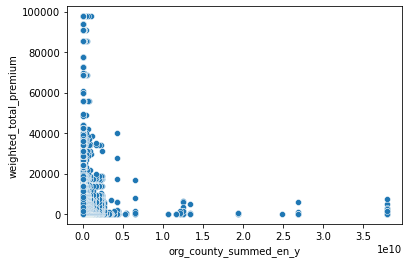

In [675]:
sns.scatterplot(data = three_five, x = 'org_county_summed_en_y', y= 'weighted_total_premium')